# Лекция 2: Хеши для строк

Сравнение полиномов 

In [2]:
def polynom1(x):
    return 3 * x**2 + 2 * x + 1

def polynom2(x):
    return 1 * x**2 + 4 * x + 5

x = 5
print((polynom1(x) == polynom2(x))

# Коллизия
x = 2
print((polynom1(x) == polynom2(x))

False

Вычислние полинома за $O(n)$:

$((a_1 x + a_2) x + a_3 ) x + a_4 ...$

In [ ]:
res = 0
for i in range(n):
    res = res * x + a[i]

**Задача:** дано $K$ полиномов степени $N$, для каждого полинома посчитать количесво совпадающих с ним.

Подставим конкретный $x \not = 0$, посчитаем значение для каждого за $O(NK)$, для каждого значения посчитаем количесво полиномов с таким же значением с помощью словаря.

**Проблема:** может быть переполнение 

**Решение:** считать по модулю (остаток от деления, кольцо вычетов по модулю)

$(a_1 x^{n-1} + a_2 x^{n-2} + ... + a_n)  \%  p$

In [ ]:
res = 0
for i in range(n):
    res = (res * x + a[i]) % p

# Совпадающие строки

Дано $K$ строк длины $N$, для каждой строки посчитать количество совпадающих с ней.

**Идея:** код символа (или порядкойвый номер буквы) можно рассматривать как коэффициент полинома. 

$abacababa$

$\textbf{121}3\textbf{121}21$

$\textbf{1}x^8 + \textbf{2}x^7 + \textbf{1}x^6 + 3x^5 +\textbf{ 1}x^4 + \textbf{2}x^3 + \textbf{1}x^2 + 2x^1 + 1x^0$

Совпадающим подстрокам соотвествуют совпадающие подряд идущие коэффициенты.

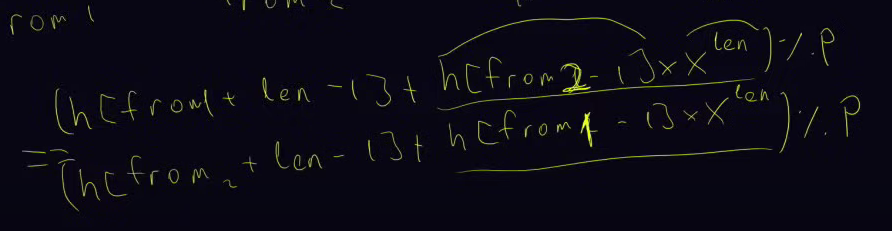

# A. Равенство подстрок

In [96]:
file = 43

with open(f'{file}.txt', 'r') as f:
    lines = f.readlines()
    
s = lines[0].rstrip()
q = int(lines[1])
request = []
for i in range(2, len(lines)):
    request.append(list(map(int, lines[i].split())))
    
n = len(s)

# x_ = 257
# p = 1e9 + 7
x_ = 23
p = 93332999


h = [0] * (n + 1)
x = [0] * (n + 1)
x[0] = 1
# s = " " + s
for i in range(1, n + 1):
    # h[i] = (h[i - 1] * x_ + (ord(s[i-1]) - ord('a') + 1)) % p
    h[i] = (h[i - 1] * x_ + (ord(s[i-1]))) % p
    x[i] = (x[i - 1] * x_) % p
    # h[i] = h[i - 1] * x_ + (ord(s[i]) - ord('a') + 1)
    # x[i] = x[i - 1] * x_

def isequa(from1, from2, slen):   
    return( 
        (h[from1 + slen] + h[from2] * x[slen]) % p
        ==
        (h[from2 + slen] + h[from1] * x[slen]) % p
    )

result = []
for i in range(q):
    L, A, B = request[i]
    if isequa(A, B, L):
        result.append('yes')
    else:
        result.append('no')
    #print(s[A:A+L], s[B:B+L])
# print(*result, sep='\n')

In [ ]:
ans = []
with open(f'{file}a.txt', 'r') as f:
    lines = f.readlines()
    
for i in range(len(lines)):
    ans.append(lines[i].rstrip())

In [ ]:
for i in range(q):
    if result[i] != ans[i]:
        L, A, B = request[i]
        print(f"result[{i}] = {result[i]} ; ans[{i}] = {ans[i]} ; ")
        print(L, A, B)
        print(f"{s[A:A+L] == s[B:B+L]}")

# B. Основание строки

Строка S была записана много раз подряд, после чего от получившейся строки взяли префикс и дали вам. Ваша задача определить минимально возможную длину исходной строки S.

Пример 1
* zzz
* 1

Пример 2
* bcabcab
* 3

Ищем максимальный по длине префикс (начало строки) который совпадает с суффиксом (концом) этой строки.

Если они совпали, то мы легко найдем циклический повтор.

In [134]:
# s = input()
# s = 'zzzzzzzzzzz'
# s = 'abaabaabaabaaba'
# s = 'bcabcab'
# s = 'qwertyuiop'
# s = '341234123412341234'
s = '123456789'

n = len(s)
x_ = 23
p = 93332999
h = [0] * (n + 1)
x = [0] * (n + 1)
x[0] = 1

for i in range(1, n + 1):
    h[i] = (h[i - 1] * x_ + (ord(s[i-1]))) % p
    x[i] = (x[i - 1] * x_) % p
    
def isequa(from1, from2, slen):   
    return( 
        (h[from1 + slen] + h[from2] * x[slen]) % p
        ==
        (h[from2 + slen] + h[from1] * x[slen]) % p
    )

max_L = 0
for L in range(1, n):
    A, B = 0, n - L
    if isequa(A, B, L):
        max_L = L
        # print(L, s[A:A+L], s[B:B+L])
        
if max_L == 0:
    print(n)
else:
    print(n - max_L)

9


# C. Z-функция

Дана непустая строка $S$, длина которой $N$ не превышает $10^6$. Будем считать, что элементы строки нумеруются от $0$ до $N-1$.

Вычислите $z$-функцию $z[i]$ для всех $i$ от $0$ до $N-1$. $z[i]$ определяется как максимальная длина подстроки, начинающейся с позиции $i$ и совпадающей с префиксом всей строки. $z[0] = 0$.

С помощь бин-поиска ищем саму длинную чать, которая совпадает.

Ищем место где подстроки начинат не совпадать.

In [4]:
# s = "abracadabra"
# ans = '0 0 0 1 0 1 0 4 0 0 1'.split()

(11, 11)

In [8]:
with open('89.txt', 'r') as f:
    lines = f.readlines()
s = lines[0].rstrip()
len(s) - 581279

418721

In [9]:
with open('89a.txt', 'r') as f:
    lines = f.readlines()
ans = list(map(int, lines[0].split()))

In [14]:
# with open('input.txt', 'r') as f:
#     lines = f.readlines()
# s = lines[0].rstrip()

n = len(s)
z = [0] * n
x_ = 257
p = 93332999
h = [0] * (n + 1)
x = [0] * (n + 1)
x[0] = 1
for i in range(1, n + 1):
    h[i] = (h[i - 1] * x_ + (ord(s[i-1]))) % p
    x[i] = (x[i - 1] * x_) % p
def isequa(from1, from2, slen):   
    return( 
        (h[from1 + slen] + h[from2] * x[slen]) % p
        ==
        (h[from2 + slen] + h[from1] * x[slen]) % p
    )
def binSearch_K(i):
    left = i
    right = len(s)
    while left < right:
        mid = (left + right) // 2
        A, B, L = 0, i, mid - i + 1
        if isequa(A, B, L):
            left = mid + 1
        else:
            right = mid
    return left - i

for i in range(1, n):
    z[i] = binSearch_K(i)
    
print(*z)

In [15]:
for i in range(n):
    if z[i] != ans[i]:
        print(i, z[i], ans[i])

# Свой поисковик

* Суффиксный массив - отсортированный массив суффиксов
* Бин поиском ищем какая подстрока меньше
* Написать внутри **компоратора** бинарный поиск
* Быстро найти строки, которые начинаются с запроса в нашем суффиксном массиве

Циклические перестановки:
* молоко
* олоком
* локомо
* окомол
* ...

Можно применить RLE (алгоритм упаковки подряд идущих символов)

По последнему столбцу столбцу можно восстановить всю строку

Преобразование Барроуза — Уилера (англ. Burrows-Wheeler transform)

# D. Кубики в зеркале

In [ ]:
with open('input.txt', 'r') as f:
    lines = f.readlines()
n, m = map(int, lines[0].split())
s = list(map(int, lines[1].rstrip().split()))

x_ = 257
p = 93332999

h = [0] * (n + 1)
x = [0] * (n + 1)
x[0] = 1
for i in range(1, n + 1):
    h[i] = (h[i - 1] * x_ + (s[i-1])) % p
    x[i] = (x[i - 1] * x_) % p
    
s_reverse = s[::-1]
h_reverse = [0] * (n + 1)
x_reverse = [0] * (n + 1)
x_reverse[0] = 1
for i in range(1, n + 1):
    h_reverse[i] = (h_reverse[i - 1] * x_ + (s_reverse[i-1])) % p
    x_reverse[i] = (x_reverse[i - 1] * x_) % p
    
def isequa(from1, from2, slen):
    return( 
        (h[from1 + slen] - h[from1] * x[slen]) % p
        ==
        (h_reverse[from2 + slen] - h_reverse[from2] * x[slen]) % p
    )

K = []
for j in range(n // 2 + 1):
    if isequa(0, n-2*j, j):
        K.append(n - j) 
print(*K[::-1])

# E. Подпалиндромы

Напишите программу, которая определит, сколько подстрок данной строки является палиндромами.

In [20]:
with open('input.txt', 'r') as f:
    lines = f.readlines()
s = lines[0].rstrip()
# s = 'aba'
s_reverse = s[::-1]
n = len(s)
x_ = 257
p = 93332999

h = [0] * (n + 1)
x = [0] * (n + 1)
x[0] = 1
for i in range(1, n + 1):
    h[i] = (h[i - 1] * x_ + (ord(s[i-1]))) % p
    x[i] = (x[i - 1] * x_) % p
    
h_reverse = [0] * (n + 1)
x_reverse = [0] * (n + 1)
x_reverse[0] = 1
for i in range(1, n + 1):
    h_reverse[i] = (h_reverse[i - 1] * x_ + (ord(s_reverse[i-1]))) % p
    x_reverse[i] = (x_reverse[i - 1] * x_) % p
    
def isequa(from1, from2, slen):
    return( 
        (h[from1 + slen] - h[from1] * x[slen]) % p
        ==
        (h_reverse[from2 + slen] - h_reverse[from2] * x[slen]) % p
    )

K = len(s)
for i in range(2, len(s) + 1):
    for j in range(0, len(s) + 1 - i):
        if isequa(j, n - j - i, i):
            K += 1
print(K)

6


In [18]:
s

'abdsaw'